# Import Libraries

In [1]:
# general libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

# hugging face libraries
from datasets import load_dataset

# scikit-learn libraries
from sklearn.metrics import (
    roc_curve, 
    auc,
    roc_auc_score,
    recall_score,
    accuracy_score,
    confusion_matrix
)

In [2]:
import sys
sys.path.append('../')

from model_test import model_test

# Load Dataset

In [3]:
path = os.path.abspath('../../datasets/ISIC-2016/split')

In [4]:
# load dataset
dataset = load_dataset(path)

Resolving data files:   0%|          | 0/900 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/379 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/Mominul Islam/.cache/huggingface/datasets/imagefolder/split-a3b231d118fd3604/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 900
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 379
    })
})

In [6]:
# num of test samples
print('Test Samples: ', dataset['test'].num_rows)

Test Samples:  379


In [7]:
# num of features
dataset['test'].features['label']

ClassLabel(names=['benign', 'malignant'], id=None)

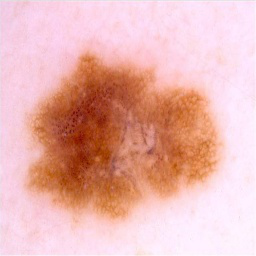

In [8]:
# show image
dataset['test'][42]['image']

In [9]:
# show label
dataset['test'][42]['label']

0

# Load Models

In [10]:
# load models
st_model = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-no-filtering')
st_model_FBGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fbgt-alpha-1')
st_model_FBGT_alpha_2 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fbgt-alpha-2')
st_model_FBGT_alpha_3 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fbgt-alpha-3')
st_model_FAGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fagt-alpha-1')
st_model_FAGT_alpha_2 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fagt-alpha-2')
st_model_FAGT_alpha_3 = os.path.abspath('../../models/ISIC-2016/Swin-Transformer/isic-2016-swin-fagt-alpha-3')

vit_model = os.path.abspath('../../models/ISIC-2016/ViT/isic-2016-vit-no-filtering')
vit_model_FBGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/ViT/isic-2016-vit-fbgt-alpha-1')
vit_model_FAGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/ViT/isic-2016-vit-fagt-alpha-1')

convnext_model = os.path.abspath('../../models/ISIC-2016/ConvNeXt/isic-2016-convnext-no-filtering')
convnext_model_FBGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/ConvNeXt/isic-2016-convnext-no-fbgt-alpha-1')
convnext_model_FAGT_alpha_1 = os.path.abspath('../../models/ISIC-2016/ConvNeXt/isic-2016-convnext-no-fagt-alpha-1')

In [11]:
# predictions 
print('Swin Transformer + No-Filtering')
st_pred = model_test(st_model, dataset)

print('Swin Transformer + FBGT (α=0.80)')
st_pred_FBGT_alpha_1 = model_test(st_model_FBGT_alpha_1, dataset)
print('Swin Transformer + FBGT (α=0.85)')
st_pred_FBGT_alpha_2 = model_test(st_model_FBGT_alpha_2, dataset)
print('Swin Transformer + FBGT (α=0.90)')
st_pred_FBGT_alpha_3 = model_test(st_model_FBGT_alpha_3, dataset)

print('Swin Transformer + FAGT (α=0.75)')
st_pred_FAGT_alpha_1 = model_test(st_model_FAGT_alpha_1, dataset)
print('Swin Transformer + FAGT (α=0.80)')
st_pred_FAGT_alpha_2 = model_test(st_model_FAGT_alpha_2, dataset)
print('Swin Transformer + FAGT (α=0.85)')
st_pred_FAGT_alpha_3 = model_test(st_model_FAGT_alpha_3, dataset)

Swin Transformer + No-Filtering


C:\Anaconda\anaconda3\envs\csf-model\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Swin Transformer + FBGT (α=0.80)


Swin Transformer + FBGT (α=0.85)


Swin Transformer + FBGT (α=0.90)


Swin Transformer + FAGT (α=0.75)


Swin Transformer + FAGT (α=0.80)


Swin Transformer + FAGT (α=0.85)


In [12]:
print('ViT + No-Filtering')
vit_pred = model_test(vit_model, dataset)
print('ViT + FBGT (α=0.80)')
vit_pred_FBGT_alpha_1 = model_test(vit_model_FBGT_alpha_1, dataset)
print('vit + FAGT (α=0.75)')
vit_pred_FAGT_alpha_1 = model_test(vit_model_FAGT_alpha_1, dataset)

ViT + No-Filtering


ViT + FBGT (α=0.80)


vit + FAGT (α=0.75)


In [13]:
print('ConvNeXt + No-Filtering')
convnext_pred = model_test(convnext_model, dataset)
print('ConvNeXt + FBGT (α=0.80)')
convnext_pred_FBGT_alpha_1 = model_test(convnext_model_FBGT_alpha_1, dataset)
print('ConvNeXt + FAGT (α=0.75)')
convnext_pred_FAGT_alpha_1 = model_test(convnext_model_FAGT_alpha_1, dataset)

ConvNeXt + No-Filtering


C:\Anaconda\anaconda3\envs\csf-model\lib\site-packages\transformers\models\convnext\feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


ConvNeXt + FBGT (α=0.80)


ConvNeXt + FAGT (α=0.75)


In [14]:
def to_categorical(y, num_classes):
    """ 1-hot encoding """
    return np.eye(num_classes, dtype='uint8')[y]

def test_set_gt(test_set):
    y = []
    for i in range(test_set.num_rows):
        y.append(test_set[i]['label'])
    return np.array(y)

In [15]:
############## true ##############
# y_true_flat
y_true_flat = test_set_gt(dataset['test'])

# y_true
y_true = to_categorical(y_true_flat, 2)

############## predicted ##############
# y_pred_flat
y_pred_flat_st = np.argmax(st_pred, axis=-1)
y_pred_flat_st_FBGT_alpha_1 = np.argmax(st_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_st_FBGT_alpha_2 = np.argmax(st_pred_FBGT_alpha_2, axis=-1)
y_pred_flat_st_FBGT_alpha_3 = np.argmax(st_pred_FBGT_alpha_3, axis=-1)
y_pred_flat_st_FAGT_alpha_1 = np.argmax(st_pred_FAGT_alpha_1, axis=-1)
y_pred_flat_st_FAGT_alpha_2 = np.argmax(st_pred_FAGT_alpha_2, axis=-1)
y_pred_flat_st_FAGT_alpha_3 = np.argmax(st_pred_FAGT_alpha_3, axis=-1)

y_pred_flat_vit = np.argmax(vit_pred, axis=-1)
y_pred_flat_vit_FBGT_alpha_1 = np.argmax(vit_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_vit_FAGT_alpha_1 = np.argmax(vit_pred_FAGT_alpha_1, axis=-1)

y_pred_flat_convnext = np.argmax(convnext_pred, axis=-1)
y_pred_flat_convnext_FBGT_alpha_1 = np.argmax(convnext_pred_FBGT_alpha_1, axis=-1)
y_pred_flat_convnext_FAGT_alpha_1 = np.argmax(convnext_pred_FAGT_alpha_1, axis=-1)

# y_pred
y_pred_st = st_pred
y_pred_st_FBGT_alpha_1 = st_pred_FBGT_alpha_1
y_pred_st_FBGT_alpha_2 = st_pred_FBGT_alpha_2
y_pred_st_FBGT_alpha_3 = st_pred_FBGT_alpha_3
y_pred_st_FAGT_alpha_1 = st_pred_FAGT_alpha_1
y_pred_st_FAGT_alpha_2 = st_pred_FAGT_alpha_2
y_pred_st_FAGT_alpha_3 = st_pred_FAGT_alpha_3

y_pred_vit = vit_pred
y_pred_vit_FBGT_alpha_1 = vit_pred_FBGT_alpha_1
y_pred_vit_FAGT_alpha_1 = vit_pred_FAGT_alpha_1

y_pred_convnext = convnext_pred
y_pred_convnext_FBGT_alpha_1 = convnext_pred_FBGT_alpha_1
y_pred_convnext_FAGT_alpha_1 = convnext_pred_FAGT_alpha_1

# Sensitivity

In [16]:
def cal_sensitivity(y_pred_flat):
    TN, FP, FN, TP = confusion_matrix(y_true_flat, y_pred_flat).ravel()
    sensitivity = '{0:.2f}'.format(TP/(TP+FN)*100)
    return sensitivity

In [17]:
print("Swin T. | Sensitivity | No-Filtering: ", cal_sensitivity(y_pred_flat_st))
print("")
print("Swin T. | Sensitivity | FBGT (α=0.80): ", cal_sensitivity(y_pred_flat_st_FBGT_alpha_1))
print("Swin T. | Sensitivity | FBGT (α=0.85): ", cal_sensitivity(y_pred_flat_st_FBGT_alpha_2))
print("Swin T. | Sensitivity | FBGT (α=0.90): ", cal_sensitivity(y_pred_flat_st_FBGT_alpha_3))
print("")
print("Swin T. | Sensitivity | FAGT (α=0.75): ", cal_sensitivity(y_pred_flat_st_FAGT_alpha_1))
print("Swin T. | Sensitivity | FAGT (α=0.80): ", cal_sensitivity(y_pred_flat_st_FAGT_alpha_2))
print("Swin T. | Sensitivity | FAGT (α=0.85): ", cal_sensitivity(y_pred_flat_st_FAGT_alpha_3))
print("")

print("ViT | Sensitivity | No-Filtering: ", cal_sensitivity(y_pred_flat_vit))
print("ViT | Sensitivity | FBGT (α=0.80): ", cal_sensitivity(y_pred_flat_vit_FBGT_alpha_1))
print("ViT | Sensitivity | FAGT (α=0.75): ", cal_sensitivity(y_pred_flat_vit_FAGT_alpha_1))
print("")

print("ConvNeXt | Sensitivity | No-Filtering: ", cal_sensitivity(y_pred_flat_convnext))
print("ConvNeXt | Sensitivity | FBGT (α=0.80): ", cal_sensitivity(y_pred_flat_convnext_FBGT_alpha_1))
print("ConvNeXt | Sensitivity | FAGT (α=0.75): ", cal_sensitivity(y_pred_flat_convnext_FAGT_alpha_1))

Swin T. | Sensitivity | No-Filtering:  57.33

Swin T. | Sensitivity | FBGT (α=0.80):  66.67
Swin T. | Sensitivity | FBGT (α=0.85):  57.33
Swin T. | Sensitivity | FBGT (α=0.90):  62.67

Swin T. | Sensitivity | FAGT (α=0.75):  62.67
Swin T. | Sensitivity | FAGT (α=0.80):  58.67
Swin T. | Sensitivity | FAGT (α=0.85):  58.67

ViT | Sensitivity | No-Filtering:  53.33
ViT | Sensitivity | FBGT (α=0.80):  60.00
ViT | Sensitivity | FAGT (α=0.75):  72.00

ConvNeXt | Sensitivity | No-Filtering:  56.00
ConvNeXt | Sensitivity | FBGT (α=0.80):  58.67
ConvNeXt | Sensitivity | FAGT (α=0.75):  57.33


# False Negative (FN)

In [18]:
def cal_fn(y_pred_flat):
    TN, FP, FN, TP = confusion_matrix(y_true_flat, y_pred_flat).ravel()
    return FN

In [19]:
print("Swin Transformer | FN | No-Filtering: ", cal_fn(y_pred_flat_st))
print("")
print("Swin Transformer | FN | FBGT (α=0.80): ", cal_fn(y_pred_flat_st_FBGT_alpha_1))
print("Swin Transformer | FN | FBGT (α=0.85): ", cal_fn(y_pred_flat_st_FBGT_alpha_2))
print("Swin Transformer | FN | FBGT (α=0.90): ", cal_fn(y_pred_flat_st_FBGT_alpha_3))
print("")
print("Swin Transformer | FN | FAGT (α=0.75): ", cal_fn(y_pred_flat_st_FAGT_alpha_1))
print("Swin Transformer | FN | FAGT (α=0.80): ", cal_fn(y_pred_flat_st_FAGT_alpha_2))
print("Swin Transformer | FN | FAGT (α=0.85): ", cal_fn(y_pred_flat_st_FAGT_alpha_3))
print("")

print("ViT | FN | No-Filtering: ", cal_fn(y_pred_flat_vit))
print("ViT | FN | FBGT (α=0.80): ", cal_fn(y_pred_flat_vit_FBGT_alpha_1))
print("ViT | FN | FAGT (α=0.75): ", cal_fn(y_pred_flat_vit_FAGT_alpha_1))
print("")

print("ConvNeXt | FN | No-Filtering: ", cal_fn(y_pred_flat_convnext))
print("ConvNeXt | FN | FBGT (α=0.80): ", cal_fn(y_pred_flat_convnext_FBGT_alpha_1))
print("ConvNeXt | FN | FAGT (α=0.75): ", cal_fn(y_pred_flat_convnext_FAGT_alpha_1))

Swin Transformer | FN | No-Filtering:  32

Swin Transformer | FN | FBGT (α=0.80):  25
Swin Transformer | FN | FBGT (α=0.85):  32
Swin Transformer | FN | FBGT (α=0.90):  28

Swin Transformer | FN | FAGT (α=0.75):  28
Swin Transformer | FN | FAGT (α=0.80):  31
Swin Transformer | FN | FAGT (α=0.85):  31

ViT | FN | No-Filtering:  35
ViT | FN | FBGT (α=0.80):  30
ViT | FN | FAGT (α=0.75):  21

ConvNeXt | FN | No-Filtering:  33
ConvNeXt | FN | FBGT (α=0.80):  31
ConvNeXt | FN | FAGT (α=0.75):  32


# Plot | Sensitivity & FN

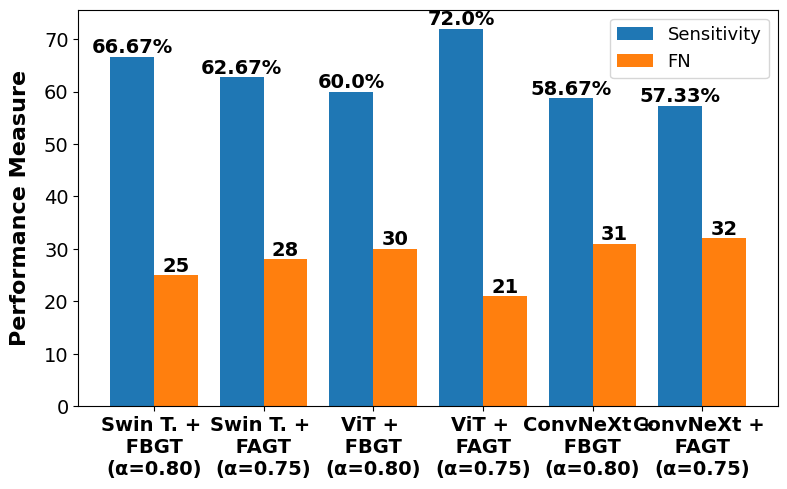

In [20]:
sensitivity = [float(cal_sensitivity(y_pred_flat_st_FBGT_alpha_1)),
               float(cal_sensitivity(y_pred_flat_st_FAGT_alpha_1)),
               float(cal_sensitivity(y_pred_flat_vit_FBGT_alpha_1)),
               float(cal_sensitivity(y_pred_flat_vit_FAGT_alpha_1)),
               float(cal_sensitivity(y_pred_flat_convnext_FBGT_alpha_1)),
               float(cal_sensitivity(y_pred_flat_convnext_FAGT_alpha_1))]

false_negative = [int(cal_fn(y_pred_flat_st_FBGT_alpha_1)),
                  int(cal_fn(y_pred_flat_st_FAGT_alpha_1)),
                  int(cal_fn(y_pred_flat_vit_FBGT_alpha_1)),
                  int(cal_fn(y_pred_flat_vit_FAGT_alpha_1)),
                  int(cal_fn(y_pred_flat_convnext_FBGT_alpha_1)),
                  int(cal_fn(y_pred_flat_convnext_FAGT_alpha_1))]

x_labels = ['Swin T. + \n FBGT \n(α=0.80)', 
          'Swin T. + \n FAGT \n(α=0.75)', 
          'ViT + \n FBGT \n(α=0.80)', 
          'ViT + \n FAGT \n(α=0.75)' ,
          'ConvNeXt + \n FBGT \n(α=0.80)',
          'ConvNeXt + \n FAGT \n(α=0.75)']  # Labels for the x-axis

# Calculate the width for each bar
bar_width = 0.4

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(sensitivity))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust the figure size as desired

# Plot the sensitivity bars
sensitivity_bars = ax.bar(bar_positions, sensitivity, bar_width, label='Sensitivity')

# Plot the false negative bars
false_negative_bars = ax.bar(bar_positions + bar_width, false_negative, bar_width, label='FN')

# Set labels and title
ax.set_ylabel('Performance Measure', fontsize=16, labelpad=10, weight='bold')  # Increase the font size of y-label

ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(x_labels, fontsize=14, weight='bold')  # Increase the font size of x-tick labels
ax.yaxis.set_tick_params(labelsize=14)  # Increase the font size of y-tick labels

# Add value labels on top of each bar
for bar in sensitivity_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}%', ha='center', va='bottom', fontsize=14, weight='bold')  # Increase the font size of value labels

for bar in false_negative_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=14, weight='bold')  # Increase the font size of value labels

# Add legend
ax.legend(fontsize=13)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent labels from getting cut off
plt.show()

# fig = ax.get_figure()
# fig.savefig('../../plots/outputs/fig-isic-2016-analysis.pdf', bbox_inches='tight')

# AUC (+ Class)

In [21]:
def cal_auc_pos(y_pred):
    neg_cls = 0 # benign
    pos_cls = 1 # malignant
    auc_pos = '{0:.2f}%'.format(roc_auc_score(y_true[:, pos_cls], y_pred[:, pos_cls])*100)
    return auc_pos

In [22]:
print("Swin Transformer | AUC (Positive Class) | No-Filtering: ", cal_auc_pos(y_pred_st))
print("")
print("Swin Transformer | AUC (Positive Class) | FBGT (α=0.80): ", cal_auc_pos(y_pred_st_FBGT_alpha_1))
print("Swin Transformer | AUC (Positive Class) | FBGT (α=0.85): ", cal_auc_pos(y_pred_st_FBGT_alpha_2))
print("Swin Transformer | AUC (Positive Class) | FBGT (α=0.90): ", cal_auc_pos(y_pred_st_FBGT_alpha_3))
print("")
print("Swin Transformer | AUC (Positive Class) | FAGT (α=0.75): ", cal_auc_pos(y_pred_st_FAGT_alpha_1))
print("Swin Transformer | AUC (Positive Class) | FAGT (α=0.80): ", cal_auc_pos(y_pred_st_FAGT_alpha_2))
print("Swin Transformer | AUC (Positive Class) | FAGT (α=0.85): ", cal_auc_pos(y_pred_st_FAGT_alpha_3))
print("")

print("ViT | AUC (Positive Class) | No-Filtering: ", cal_auc_pos(y_pred_vit))
print("ViT | AUC (Positive Class) | FBGT (α=0.80): ", cal_auc_pos(y_pred_vit_FBGT_alpha_1))
print("ViT | AUC (Positive Class) | FAGT (α=0.75): ", cal_auc_pos(y_pred_vit_FAGT_alpha_1))
print("")

print("ConvNeXt | AUC (Positive Class) | No-Filtering: ", cal_auc_pos(y_pred_convnext))
print("ConvNeXt | AUC (Positive Class) | FBGT (α=0.80): ", cal_auc_pos(y_pred_convnext_FBGT_alpha_1))
print("ConvNeXt | AUC (Positive Class) | FAGT (α=0.75): ", cal_auc_pos(y_pred_convnext_FAGT_alpha_1))

Swin Transformer | AUC (Positive Class) | No-Filtering:  80.68%

Swin Transformer | AUC (Positive Class) | FBGT (α=0.80):  81.36%
Swin Transformer | AUC (Positive Class) | FBGT (α=0.85):  83.13%
Swin Transformer | AUC (Positive Class) | FBGT (α=0.90):  82.81%

Swin Transformer | AUC (Positive Class) | FAGT (α=0.75):  83.40%
Swin Transformer | AUC (Positive Class) | FAGT (α=0.80):  83.45%
Swin Transformer | AUC (Positive Class) | FAGT (α=0.85):  83.17%

ViT | AUC (Positive Class) | No-Filtering:  82.94%
ViT | AUC (Positive Class) | FBGT (α=0.80):  83.91%
ViT | AUC (Positive Class) | FAGT (α=0.75):  82.47%

ConvNeXt | AUC (Positive Class) | No-Filtering:  75.46%
ConvNeXt | AUC (Positive Class) | FBGT (α=0.80):  79.38%
ConvNeXt | AUC (Positive Class) | FAGT (α=0.75):  80.01%


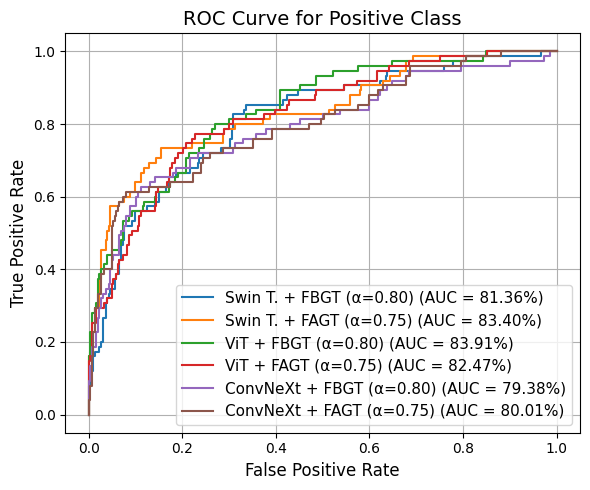

In [23]:
pos_cls = 1  # malignant

y_preds = [
    y_pred_st_FBGT_alpha_1,
    y_pred_st_FAGT_alpha_1,
    y_pred_vit_FBGT_alpha_1,
    y_pred_vit_FAGT_alpha_1,
    y_pred_convnext_FBGT_alpha_1,
    y_pred_convnext_FAGT_alpha_1
]

titles = [
    'Swin T. + FBGT (α=0.80)',
    'Swin T. + FAGT (α=0.75)',
    'ViT + FBGT (α=0.80)',
    'ViT + FAGT (α=0.75)',
    'ConvNeXt + FBGT (α=0.80)',
    'ConvNeXt + FAGT (α=0.75)'
]  

plt.figure(figsize=(6, 5))

for idx, y_pred in enumerate(y_preds):
    # Compute the ROC curve and AUC for the positive class
    fpr, tpr, _ = roc_curve(y_true[:, pos_cls], y_pred[:, pos_cls])
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve for the positive class
    plt.plot(fpr, tpr, label=f"{titles[idx]} (AUC = {auc_score:.2%})")

# Customize the ticks and labels on the axes
plt.xlabel("False Positive Rate", fontsize='12')
plt.ylabel("True Positive Rate", fontsize='12')
plt.title("ROC Curve for Positive Class", fontsize='14')
plt.legend(fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

# AUC (- Class)

In [24]:
def cal_auc_neg(y_pred):
    neg_cls = 0 # benign
    pos_cls = 1 # malignant
    auc_neg = '{0:.2f}%'.format(roc_auc_score(y_true[:, neg_cls], y_pred[:, neg_cls])*100)
    return auc_neg

In [25]:
print("Swin Transformer | AUC (Negative Class) | No-Filtering: ", cal_auc_neg(y_pred_st))
print("")
print("Swin Transformer | AUC (Negative Class) | FBGT (α=0.80): ", cal_auc_neg(y_pred_st_FBGT_alpha_1))
print("Swin Transformer | AUC (Negative Class) | FBGT (α=0.85): ", cal_auc_neg(y_pred_st_FBGT_alpha_2))
print("Swin Transformer | AUC (Negative Class) | FBGT (α=0.90): ", cal_auc_neg(y_pred_st_FBGT_alpha_3))
print("")
print("Swin Transformer | AUC (Negative Class) | FAGT (α=0.75): ", cal_auc_neg(y_pred_st_FAGT_alpha_1))
print("Swin Transformer | AUC (Negative Class) | FAGT (α=0.80): ", cal_auc_neg(y_pred_st_FAGT_alpha_2))
print("Swin Transformer | AUC (Negative Class) | FAGT (α=0.85): ", cal_auc_neg(y_pred_st_FAGT_alpha_3))
print("")

print("ViT | AUC (Negative Class) | No-Filtering: ", cal_auc_neg(y_pred_vit))
print("ViT | AUC (Negative Class) | FBGT (α=0.80): ", cal_auc_neg(y_pred_vit_FBGT_alpha_1))
print("ViT | AUC (Negative Class) | FAGT (α=0.75): ", cal_auc_neg(y_pred_vit_FAGT_alpha_1))
print("")

print("ConvNeXt | AUC (Negative Class) | No-Filtering: ", cal_auc_neg(y_pred_convnext))
print("ConvNeXt | AUC (Negative Class) | FBGT (α=0.80): ", cal_auc_neg(y_pred_convnext_FBGT_alpha_1))
print("ConvNeXt | AUC (Negative Class) | FAGT (α=0.75): ", cal_auc_neg(y_pred_convnext_FAGT_alpha_1))

Swin Transformer | AUC (Negative Class) | No-Filtering:  80.00%

Swin Transformer | AUC (Negative Class) | FBGT (α=0.80):  82.37%
Swin Transformer | AUC (Negative Class) | FBGT (α=0.85):  83.66%
Swin Transformer | AUC (Negative Class) | FBGT (α=0.90):  82.29%

Swin Transformer | AUC (Negative Class) | FAGT (α=0.75):  84.22%
Swin Transformer | AUC (Negative Class) | FAGT (α=0.80):  84.18%
Swin Transformer | AUC (Negative Class) | FAGT (α=0.85):  83.45%

ViT | AUC (Negative Class) | No-Filtering:  79.12%
ViT | AUC (Negative Class) | FBGT (α=0.80):  84.50%
ViT | AUC (Negative Class) | FAGT (α=0.75):  83.90%

ConvNeXt | AUC (Negative Class) | No-Filtering:  76.41%
ConvNeXt | AUC (Negative Class) | FBGT (α=0.80):  78.66%
ConvNeXt | AUC (Negative Class) | FAGT (α=0.75):  80.34%


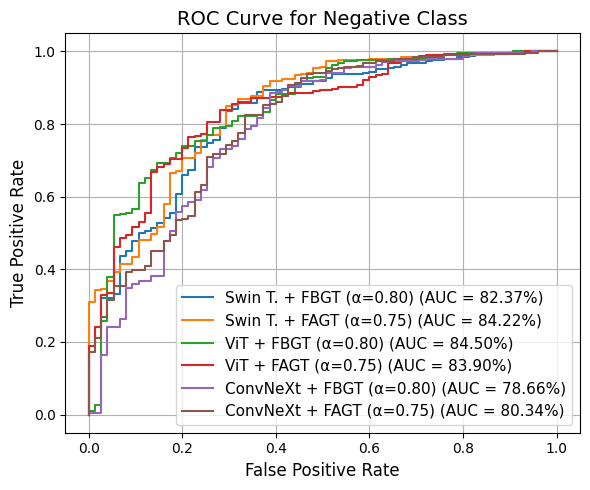

In [26]:
neg_cls = 0  # benign

y_preds = [
    y_pred_st_FBGT_alpha_1,
    y_pred_st_FAGT_alpha_1,
    y_pred_vit_FBGT_alpha_1,
    y_pred_vit_FAGT_alpha_1,
    y_pred_convnext_FBGT_alpha_1,
    y_pred_convnext_FAGT_alpha_1
]

titles = [
    'Swin T. + FBGT (α=0.80)',
    'Swin T. + FAGT (α=0.75)',
    'ViT + FBGT (α=0.80)',
    'ViT + FAGT (α=0.75)',
    'ConvNeXt + FBGT (α=0.80)',
    'ConvNeXt + FAGT (α=0.75)'
]  

plt.figure(figsize=(6, 5))

for idx, y_pred in enumerate(y_preds):
    # Compute the ROC curve and AUC for the negative class
    fpr, tpr, _ = roc_curve(y_true[:, neg_cls], y_pred[:, neg_cls])
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve for the negative class
    plt.plot(fpr, tpr, label=f"{titles[idx]} (AUC = {auc_score:.2%})")

# Customize the ticks and labels on the axes
plt.xlabel("False Positive Rate", fontsize='12')
plt.ylabel("True Positive Rate", fontsize='12')
plt.title("ROC Curve for Negative Class", fontsize='14')
plt.legend(fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

# AUC (Average)

In [27]:
def cal_auc(y_pred):
    auc = '{0:.2f}%'.format(roc_auc_score(y_true, y_pred)*100)
    return auc

In [28]:
print("Swin Transformer | AUC | No-Filtering: ", cal_auc(y_pred_st))
print("")
print("Swin Transformer | AUC | FBGT (α=0.80): ", cal_auc(y_pred_st_FBGT_alpha_1))
print("Swin Transformer | AUC | FBGT (α=0.85): ", cal_auc(y_pred_st_FBGT_alpha_2))
print("Swin Transformer | AUC | FBGT (α=0.90): ", cal_auc(y_pred_st_FBGT_alpha_3))
print("")
print("Swin Transformer | AUC | FAGT (α=0.75): ", cal_auc(y_pred_st_FAGT_alpha_1))
print("Swin Transformer | AUC | FAGT (α=0.80): ", cal_auc(y_pred_st_FAGT_alpha_2))
print("Swin Transformer | AUC | FAGT (α=0.85): ", cal_auc(y_pred_st_FAGT_alpha_3))
print("")

print("ViT | AUC | No-Filtering: ", cal_auc(y_pred_vit))
print("ViT | AUC | FBGT (α=0.80): ", cal_auc(y_pred_vit_FBGT_alpha_1))
print("ViT | AUC | FAGT (α=0.75): ", cal_auc(y_pred_vit_FAGT_alpha_1))
print("")

print("ConvNeXt | AUC | No-Filtering: ", cal_auc(y_pred_convnext))
print("ConvNeXt | AUC | FBGT (α=0.80): ", cal_auc(y_pred_convnext_FBGT_alpha_1))
print("ConvNeXt | AUC | FAGT (α=0.75): ", cal_auc(y_pred_convnext_FAGT_alpha_1))

Swin Transformer | AUC | No-Filtering:  80.34%

Swin Transformer | AUC | FBGT (α=0.80):  81.87%
Swin Transformer | AUC | FBGT (α=0.85):  83.40%
Swin Transformer | AUC | FBGT (α=0.90):  82.55%

Swin Transformer | AUC | FAGT (α=0.75):  83.81%
Swin Transformer | AUC | FAGT (α=0.80):  83.82%
Swin Transformer | AUC | FAGT (α=0.85):  83.31%

ViT | AUC | No-Filtering:  81.03%
ViT | AUC | FBGT (α=0.80):  84.21%
ViT | AUC | FAGT (α=0.75):  83.19%

ConvNeXt | AUC | No-Filtering:  75.93%
ConvNeXt | AUC | FBGT (α=0.80):  79.02%
ConvNeXt | AUC | FAGT (α=0.75):  80.18%


## Confusion Matrix

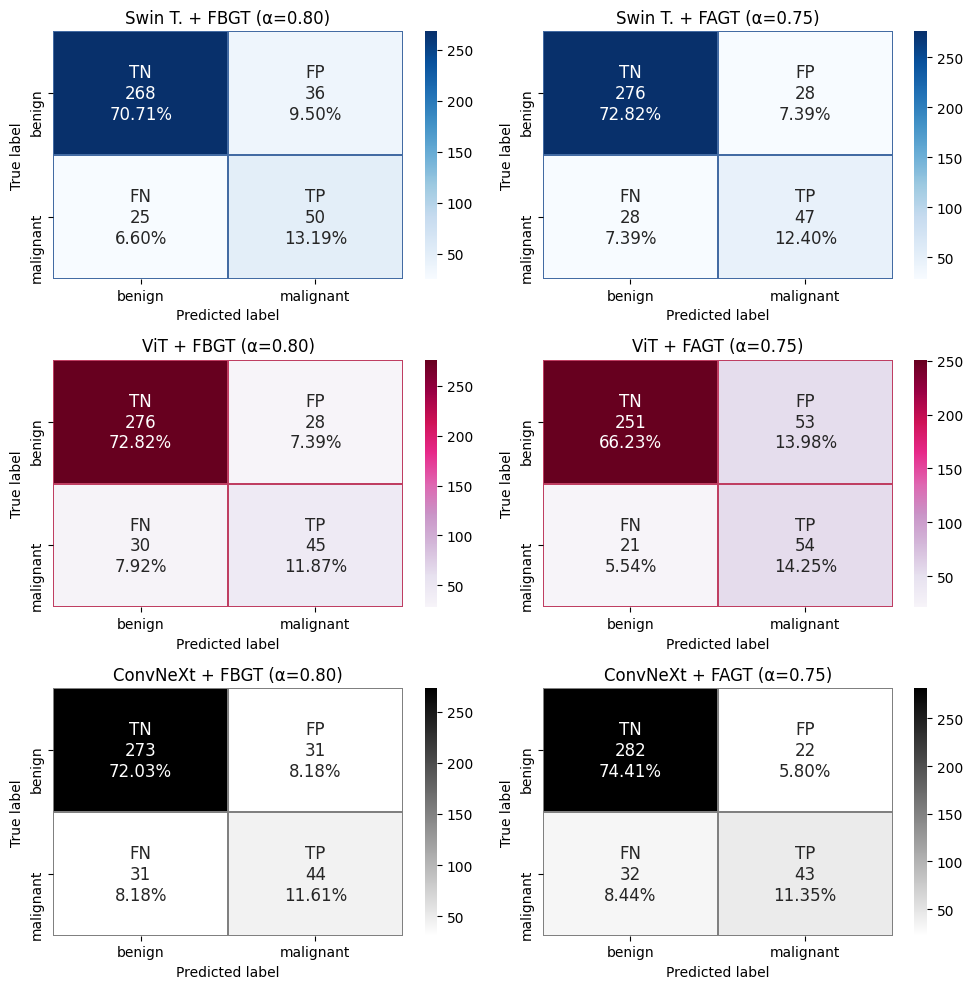

In [29]:
y_preds_flat = [
    y_pred_flat_st_FBGT_alpha_1, 
    y_pred_flat_st_FAGT_alpha_1, 
    y_pred_flat_vit_FBGT_alpha_1, 
    y_pred_flat_vit_FAGT_alpha_1,
    y_pred_flat_convnext_FBGT_alpha_1,
    y_pred_flat_convnext_FAGT_alpha_1
]

titles = [
    'Swin T. + FBGT (α=0.80)',
    'Swin T. + FAGT (α=0.75)',
    'ViT + FBGT (α=0.80)',
    'ViT + FAGT (α=0.75)',
    'ConvNeXt + FBGT (α=0.80)',
    'ConvNeXt + FAGT (α=0.75)'
] 

cmap = ['Blues', 'Blues', 'PuRd', 'PuRd', 'binary', 'binary']

linecolor = [
    (67/255, 107/255, 163/255),
    (67/255, 107/255, 163/255),
    (191/255, 62/255, 98/255),
    (191/255, 62/255, 98/255),
    'gray',
    'gray'
]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axs = axs.flatten()

# Indices of subplots where confusion matrices should be placed
cm_indices = [0, 1, 2, 3, 4, 5]

for i, cm_idx in enumerate(cm_indices):
    cnf_matrix = confusion_matrix(y_true_flat, y_preds_flat[i])
    
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    
    matrix_labels = np.asarray(labels).reshape(2,2)
    axis_labels = ['benign', 'malignant']
    
    sns.heatmap(
        cnf_matrix, 
        annot=matrix_labels, 
        fmt='',  
        cmap=cmap[i], 
        linewidths=0.1, 
        linecolor=linecolor[i],
        xticklabels=axis_labels, 
        yticklabels=axis_labels,
        ax=axs[cm_idx],
        annot_kws={"fontsize":12},
    )
    axs[cm_idx].set(xlabel='Predicted label', ylabel='True label', title=f'{titles[i]}')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Plot | Recall (macro)

In [30]:
def load_training_log(path):
    # read training log
    df = pd.read_csv(os.path.join(path, 'training_log.csv'))
    df = df[['eval_precision', 
             'eval_recall', 
             'eval_f1', 
             'eval_sensitivity', 
             'eval_specificity',
             'eval_accuracy',
             'eval_TN', 
             'eval_FP', 
             'eval_FN', 
             'eval_TP'
            ]].dropna()

    # rename columns
    df.rename(columns={'eval_precision':'Precision (macro)', 
                       'eval_recall':'Recall (macro)', 
                       'eval_f1':'F1-Score (macro)', 
                       'eval_sensitivity':'Sensitivity', 
                       'eval_specificity':'Specificity', 
                       'eval_accuracy':'Accuracy', 
                       'eval_TN':'TN', 
                       'eval_FP':'FP', 
                       'eval_FN':'FN',
                       'eval_TP':'TP'
                      }, inplace = True)

    # convert float to int
    df['TN'] = df['TN'].astype(int)
    df['FP'] = df['FP'].astype(int)
    df['FN'] = df['FN'].astype(int)
    df['TP'] = df['TP'].astype(int)
    
    return df

In [31]:
df_st_model = load_training_log(st_model)
df_st_model_FBGT_alpha_1 = load_training_log(st_model_FBGT_alpha_1)
df_st_model_FBGT_alpha_2 = load_training_log(st_model_FBGT_alpha_2)
df_st_model_FBGT_alpha_3 = load_training_log(st_model_FBGT_alpha_3)
df_st_model_FAGT_alpha_1 = load_training_log(st_model_FAGT_alpha_1)
df_st_model_FAGT_alpha_2 = load_training_log(st_model_FAGT_alpha_2)
df_st_model_FAGT_alpha_3 = load_training_log(st_model_FAGT_alpha_3)

df_vit_model = load_training_log(vit_model)
df_vit_model_FBGT_alpha_1 = load_training_log(vit_model_FBGT_alpha_1)
df_vit_model_FAGT_alpha_1 = load_training_log(vit_model_FAGT_alpha_1)

df_convnext_model = load_training_log(convnext_model)
df_convnext_model_FBGT_alpha_1 = load_training_log(convnext_model_FBGT_alpha_1)
df_convnext_model_FAGT_alpha_1 = load_training_log(convnext_model_FAGT_alpha_1)

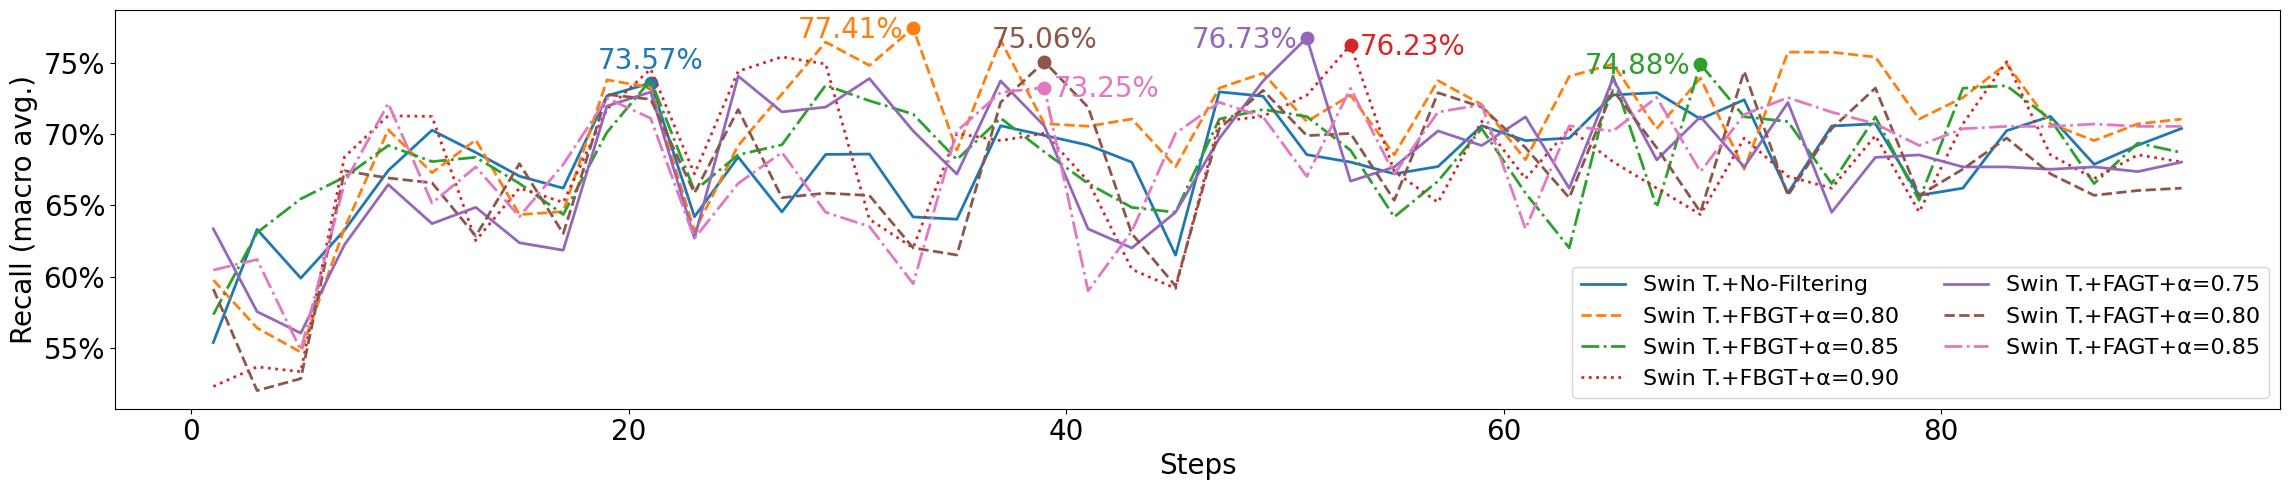

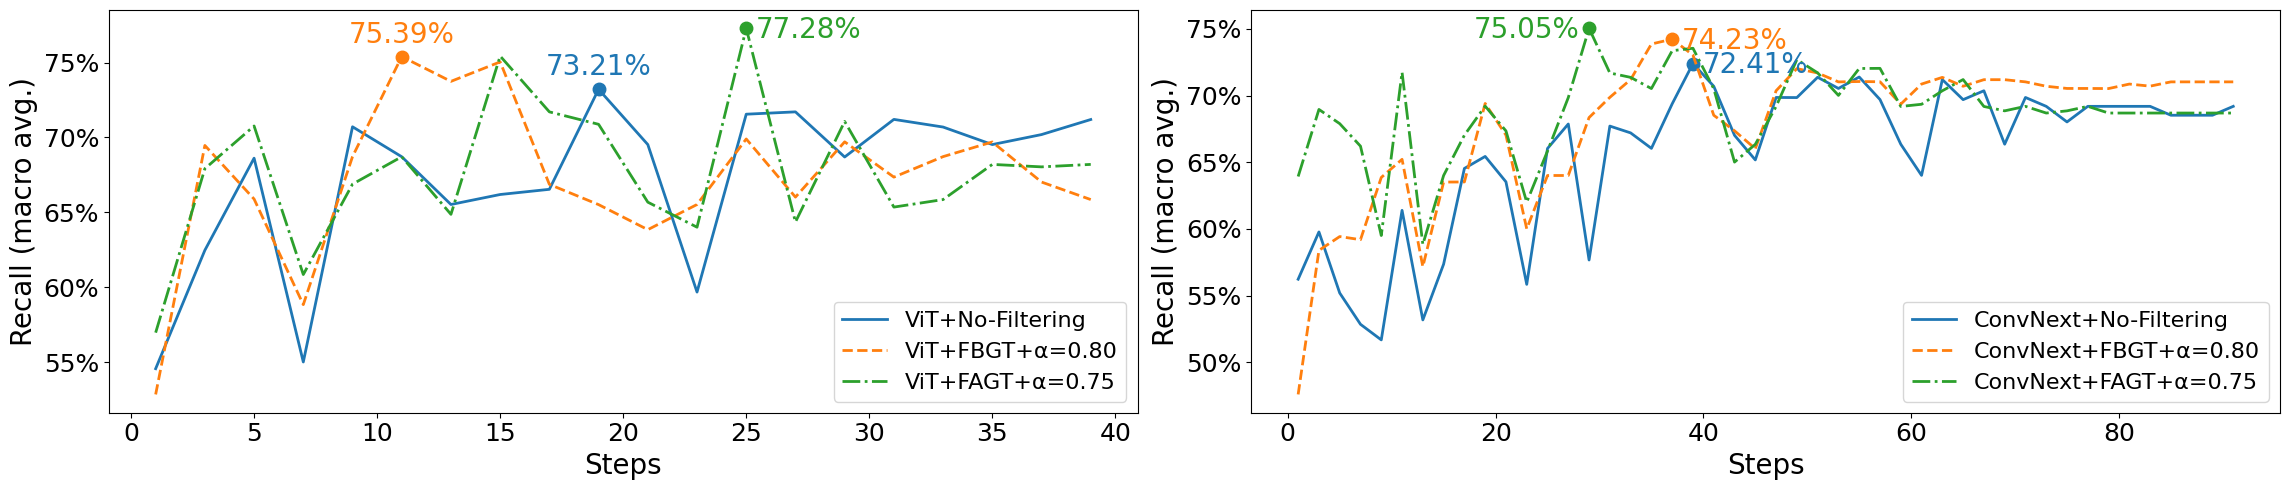

In [32]:
# Sample dataframes and plot labels
dataframes = [
    [df_st_model,
     df_st_model_FBGT_alpha_1,
     df_st_model_FBGT_alpha_2,
     df_st_model_FBGT_alpha_3,
     df_st_model_FAGT_alpha_1,
     df_st_model_FAGT_alpha_2,
     df_st_model_FAGT_alpha_3]
]

plot_labels = [
    ['Swin T.+No-Filtering', 
     'Swin T.+FBGT+α=0.80',
     'Swin T.+FBGT+α=0.85', 
     'Swin T.+FBGT+α=0.90', 
     'Swin T.+FAGT+α=0.75',
     'Swin T.+FAGT+α=0.80',
     'Swin T.+FAGT+α=0.85'
    ]
]

# Define custom colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']

# red dots
dots = [
    [[0, 10],[-45, -7],[-45, -7],[45, -7],[-45, -7],[0, 10],[45, -7]]
]

plt.figure(figsize=(23, 5))

for i, (df_row, label_row, dot_row) in enumerate(zip(dataframes, plot_labels, dots)):
    for j, (df, label, color, style, dot_pos) in enumerate(zip(df_row, label_row, colors, line_styles, dot_row)):
        x = df['Recall (macro)'].index.values.tolist()
        y = df['Recall (macro)'].values.tolist()
        y = np.array(y) * 100

        plt.plot(x, y, linestyle=style, color=color, linewidth=2, label=label)

        idx = np.argmax(y)
        x_max = x[idx]
        y_max = y[idx]

        plt.plot(x_max, y_max, marker='o', markersize=9, color=color)

        # Annotate the red dot with its value
        plt.annotate(f'{y_max:.2f}%', (x_max, y_max), textcoords="offset points", xytext=(dot_pos), ha='center', fontsize='20', color=color)

# Format y-axis as percentages for the entire plot
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
        
plt.xlabel('Steps', fontsize='20')
plt.ylabel('Recall (macro avg.)', fontsize='20')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc='lower right', fontsize='16', ncol=2)
plt.tight_layout()  
plt.savefig('../../plots/outputs/fig-isic-2016-metric-g1.pdf', bbox_inches='tight')
plt.show()
        
# Sample dataframes and plot labels
dataframes = [
    [df_vit_model, df_vit_model_FBGT_alpha_1, df_vit_model_FAGT_alpha_1],
    [df_convnext_model, df_convnext_model_FBGT_alpha_1, df_convnext_model_FAGT_alpha_1]
]

plot_labels = [
    ['ViT+No-Filtering', 'ViT+FBGT+α=0.80', 'ViT+FAGT+α=0.75'],
    ['ConvNext+No-Filtering', 'ConvNext+FBGT+α=0.80', 'ConvNext+FAGT+α=0.75']
]

# Define custom colors and line styles
colors = ['tab:blue', 'tab:orange', 'tab:green']
line_styles = ['-', '--', '-.']

# Create subplots
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(23, 5))
axs = axs.ravel()

# red dots
dots = [
    [[0, 10],[0, 10],[45, -7]],
    [[45, -7],[45, -7],[-45, -7]]
]

for i, (df_row, label_row, dot) in enumerate(zip(dataframes, plot_labels, dots)):
    ax = axs[i]
    
    for j, (df, label, color, style, dot_pos) in enumerate(zip(df_row, label_row, colors, line_styles, dot)):
        x = df['Recall (macro)'].index.values.tolist()
        y = df['Recall (macro)'].values.tolist()
        y = np.array(y) * 100

        ax.plot(x, y, linestyle=style, color=color, linewidth=2, label=label)

        idx = np.argmax(y)
        x_max = x[idx]
        y_max = y[idx]
        
        ax.plot(x_max, y_max, marker='o', markersize=9, color=color)
        
        # Annotate the red dot with its value
        ax.annotate(f'{y_max:.2f}%', (x_max, y_max), textcoords="offset points", xytext=(dot_pos), ha='center', fontsize='20', color=color)

        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.set_xlabel('Steps', fontsize='20')
        ax.set_ylabel('Recall (macro avg.)', fontsize='20')
        ax.legend(loc='lower right', fontsize='16')
        
        # Format y-axis as percentages
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}%'))
        
# Adjust layout
plt.tight_layout()
plt.savefig('../../plots/outputs/fig-isic-2016-metric-g2.pdf', bbox_inches='tight')
plt.show()